# Instalación de módulos


https://scikit-learn.org/stable/index.html


```sh
pip install -U scikit-learn
```

Esto nos instalará algunas dependencias que también utilizaremos, algunas de las más destacadas son:

- NumPy
- Pandas
- MatplotLib

In [74]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Lectura de datos de sklearn

In [57]:
import sklearn.datasets

iris_dataset = skl.datasets.load_iris(as_frame = True)


In [58]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [59]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


Podemos renombrar los columnas para que sea más sencillo el uso:

In [60]:
iris_dataset.frame = iris_dataset.frame.rename(columns = {"sepal length (cm)": "SepalLength", 
                               "sepal width (cm)": "SepalWidth",
                               "petal length (cm)": "PetalLength",
                               "petal width (cm)": "PetalWidth",
                               "target": "Class"
                              })

In [61]:
iris_dataset.frame

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Lectura de datos usando Pandas

Vamos a leer el conjunto de datos [Auto MPG](https://archive-beta.ics.uci.edu/ml/datasets/auto+mpg), del UCI ML Repository.

In [62]:
MPG_PATH = "datasets/auto-mpg.data"

nombres_columnas_mpg = ["mpg", "cylinders", "displacement", "horsepower", "weigth", "acceleration", "model year", "origin", "car name"]

mpg_dataset = pd.read_csv(MPG_PATH, sep = '\s+', header = None, names = nombres_columnas_mpg)

In [63]:
mpg_dataset

,mpg,cylinders,displacement,horsepower,weigth,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


## Análisis de los datos con Matplotlib

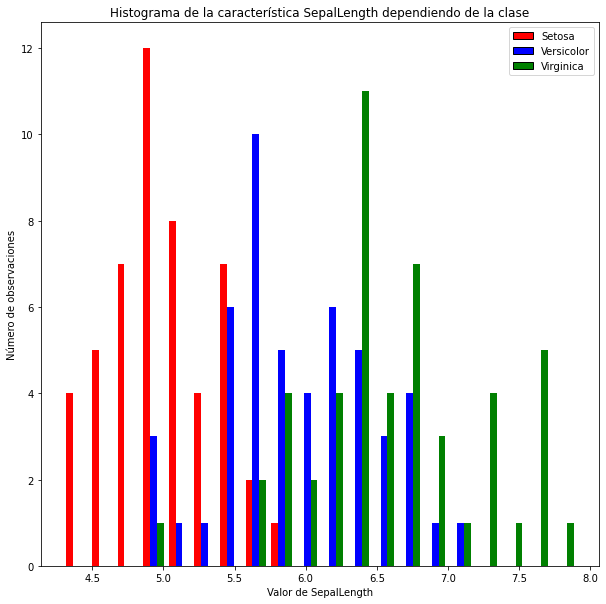

<Figure size 432x288 with 0 Axes>

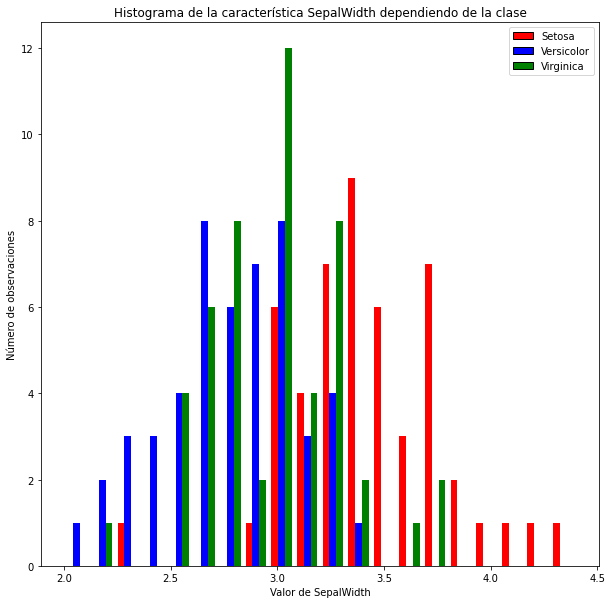

<Figure size 432x288 with 0 Axes>

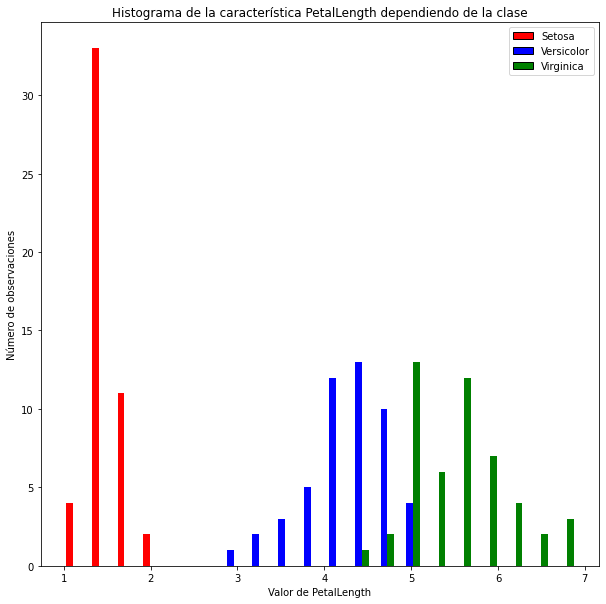

<Figure size 432x288 with 0 Axes>

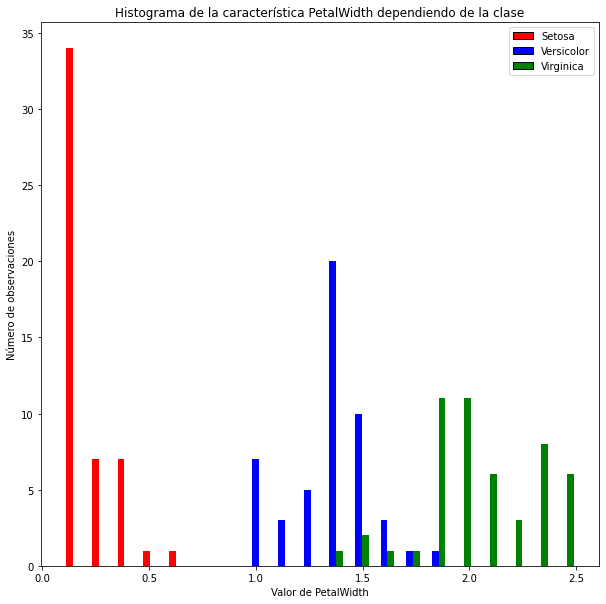

<Figure size 432x288 with 0 Axes>

In [83]:
iris_setosa = iris_dataset.frame[iris_dataset.frame["Class"] == 0]
iris_versicolor = iris_dataset.frame[iris_dataset.frame["Class"] == 1]
iris_virginica = iris_dataset.frame[iris_dataset.frame["Class"] == 2]

colores_grafico = ["red", "blue", "green"]


for column in iris_dataset.frame.columns[:-1]:
    
    plt.figure(figsize = (10, 10))
    plt.hist([iris_setosa[column], iris_versicolor[column], iris_virginica[column]], bins = 20, color = colores_grafico)
    plt.title("Histograma de la característica {} dependiendo de la clase".format(column))
    plt.xlabel("Valor de {}".format(column))
    plt.ylabel("Número de observaciones")

    handles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colores_grafico]
    labels = ["Setosa", "Versicolor", "Virginica"]
    plt.legend(handles, labels)

    plt.show()
    plt.clf()

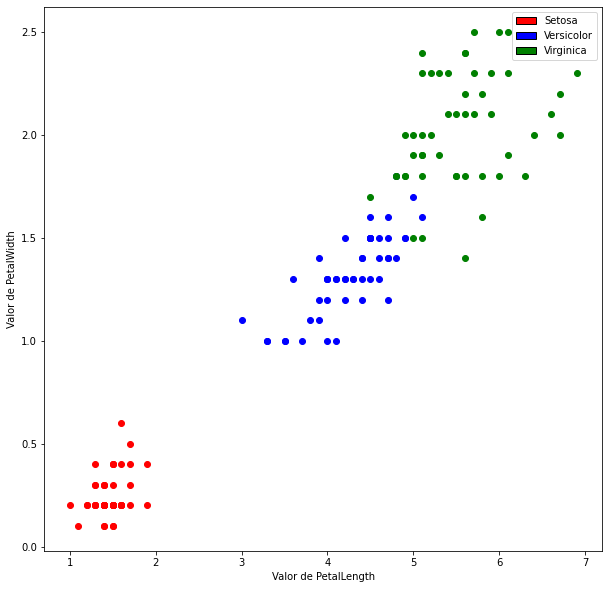

<Figure size 432x288 with 0 Axes>

In [85]:

plt.figure(figsize = (10, 10))
plt.scatter(iris_setosa["PetalLength"], iris_setosa["PetalWidth"], color = "red")
plt.scatter(iris_versicolor["PetalLength"], iris_versicolor["PetalWidth"], color = "blue")
plt.scatter(iris_virginica["PetalLength"], iris_virginica["PetalWidth"], color = "green")

plt.title("")
plt.xlabel("Valor de PetalLength")
plt.ylabel("Valor de PetalWidth")

handles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colores_grafico]
labels = ["Setosa", "Versicolor", "Virginica"]
plt.legend(handles, labels)

plt.show()
plt.clf()

In [89]:
matriz_correlacion = iris_dataset.frame.corr()

matriz_correlacion.style.background_gradient(cmap='coolwarm')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
SepalLength,1.000000,-0.117570,0.871754,0.817941,0.782561
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PetalLength,0.871754,-0.428440,1.000000,0.962865,0.949035
PetalWidth,0.817941,-0.366126,0.962865,1.000000,0.956547
Class,0.782561,-0.426658,0.949035,0.956547,1.000000


## Preprocesamiento de los datos

### Normalización de los datos

### Imputación de valores perdidos

## Entrenamiento, test y validación